## Cumulative passenger graph between any 2 stages

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('04-02-19.csv')

In [97]:
bus_no=519
#enter the bus number
df = df[df['Schedule Name'].str.contains(rf'\b{bus_no}\b')]

cols =['Schedule Name','Ticket Issued Time','Adult','From Stage','To Stage','Source','Destination']
df = df[cols]
df =df[(df['Source']=='T.NAGAR') & (df['Destination']=='THIRUPORUR')]

In [98]:
from_stages=df['From Stage'].unique()
to_stages=df['To Stage'].unique()
print("The list of from stages are: ")
print(from_stages)
print("")
print("The list of to stages are: ")
print(to_stages)

The list of from stages are: 
['T.NAGAR' 'SAIDAPET' 'ANNA UNIV' 'WPTC' 'CHURCH' 'PAL. CHEMI'
 'KUMARAN NG' 'SRP TOOLS' 'KANDANCHAV' 'KARAPAKKAM' 'THORAIPAKKAMAM'
 'M K CHAVADI' 'SHOLINGANALLUR' 'NAVALUR' 'CHEMMANCHE' 'KELAMBAKKAMM'
 'HINDUSTAN' 'KALAVAKKAM' 'THORAPPAKK' 'CHENGAMMAL' 'SIPCOT' 'ENGINEERIN']

The list of to stages are: 
['M K CHAVADI' 'THORAIPAKKAMAM' 'PAL. CHEMI' 'THIRUPORUR' 'KANDANCHAV'
 'ANNA UNIV' 'KELAMBAKKAMM' 'CHENGAMMAL' 'SRP TOOLS' 'NAVALUR'
 'SHOLINGANALLUR' 'KARAPAKKAM' 'SAIDAPET' 'CHURCH' 'KUMARAN NG' 'WPTC'
 'HINDUSTAN' 'CHEMMANCHE' 'KALAVAKKAM' 'THORAPPAKK' 'SIPCOT' 'ENGINEERIN']


In [99]:
from_stage=input("Enter From Stage: ").upper()
to_stage=input("Enter To Stage: ").upper()

df=df[(df['From Stage']==from_stage) & (df['To Stage']==to_stage)]
df['Ticket Issued Time'] = pd.to_datetime(df['Ticket Issued Time'], format='%H:%M:%S', errors='coerce')
#ignore the error


Enter From Stage: t.nagar
Enter To Stage: saidapet


In [100]:
df['Hour']=df['Ticket Issued Time'].dt.hour

df= df.groupby('Hour')['Schedule Name'].count().reset_index()
df.columns = ['Hour', 'Bus Count']

#All hours
hours= pd.DataFrame({'Hour': range(24)})
df=hours.merge(df, on='Hour', how='left').fillna(0)

df['Bus Count'] = df['Bus Count'].astype(int)
df['Cumulative Boarding'] = df['Bus Count'].cumsum()

df['Minutes'] = df['Hour'] * 60
df['10 Mins Headway']=(df['Cumulative Boarding']/6).round(1)
df['20 Mins Headway']=(df['Cumulative Boarding']/3).round(1)

#store in excel file
file_name=input("Enter File name to store: ")
df.to_excel(f"{file_name}.xlsx")
df

Enter File name to store: ddd


,Hour,Bus Count,Cumulative Boarding,Minutes,10 Mins Headway,20 Mins Headway
0,0,2,2,0,0.3,0.7
1,1,0,2,60,0.3,0.7
2,2,0,2,120,0.3,0.7
3,3,0,2,180,0.3,0.7
4,4,0,2,240,0.3,0.7
5,5,0,2,300,0.3,0.7
6,6,0,2,360,0.3,0.7
7,7,0,2,420,0.3,0.7
8,8,1,3,480,0.5,1.0
9,9,2,5,540,0.8,1.7


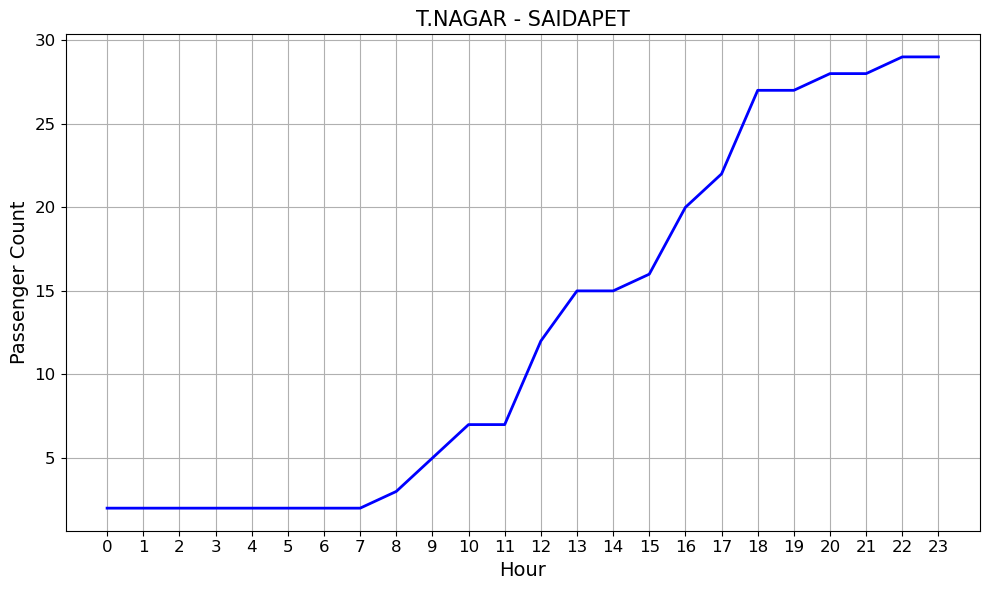

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(df['Hour'], df['Cumulative Boarding'], linestyle='-', color='b', linewidth=2)
plt.title(f"{from_stage} - {to_stage}",fontsize=15)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Passenger Count', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

26.916666666666664


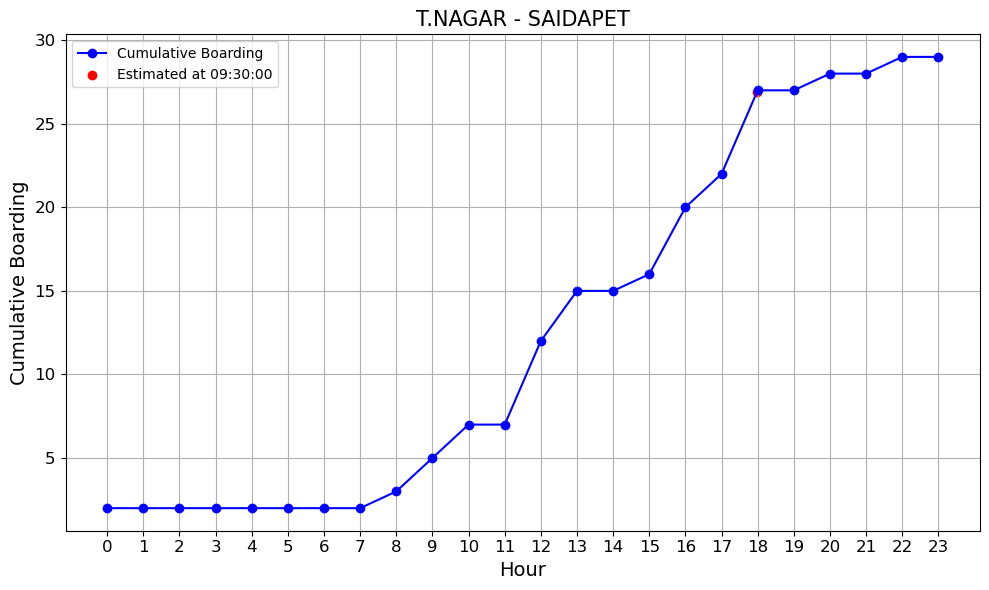

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
target_time = pd.to_datetime("17:59:00").hour * 60 + pd.to_datetime("17:59:00").minute

previous_index = df[df['Minutes'] <= target_time].index[-1]
next_index = previous_index + 1

# Get the corresponding minutes and cumulative boarding counts
previous_minutes = df.loc[previous_index, 'Minutes']
next_minutes = df.loc[next_index, 'Minutes']
previous_boarding = df.loc[previous_index, 'Cumulative Boarding']
next_boarding = df.loc[next_index, 'Cumulative Boarding']

# Interpolate between the values of the nearest minutes
interpolation_ratio = (target_time - previous_minutes) / (next_minutes - previous_minutes)
estimated_boarding = previous_boarding + (next_boarding - previous_boarding) * interpolation_ratio
print(estimated_boarding)


plt.figure(figsize=(10, 6))
plt.plot(df['Hour'], df['Cumulative Boarding'], linestyle='-', color='b', marker='o', label='Cumulative Boarding')
plt.scatter([target_time / 60], [estimated_boarding], color='r', marker='o', label='Estimated at 09:30:00')
plt.title(f"{from_stage} - {to_stage}",fontsize=15)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Cumulative Boarding', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


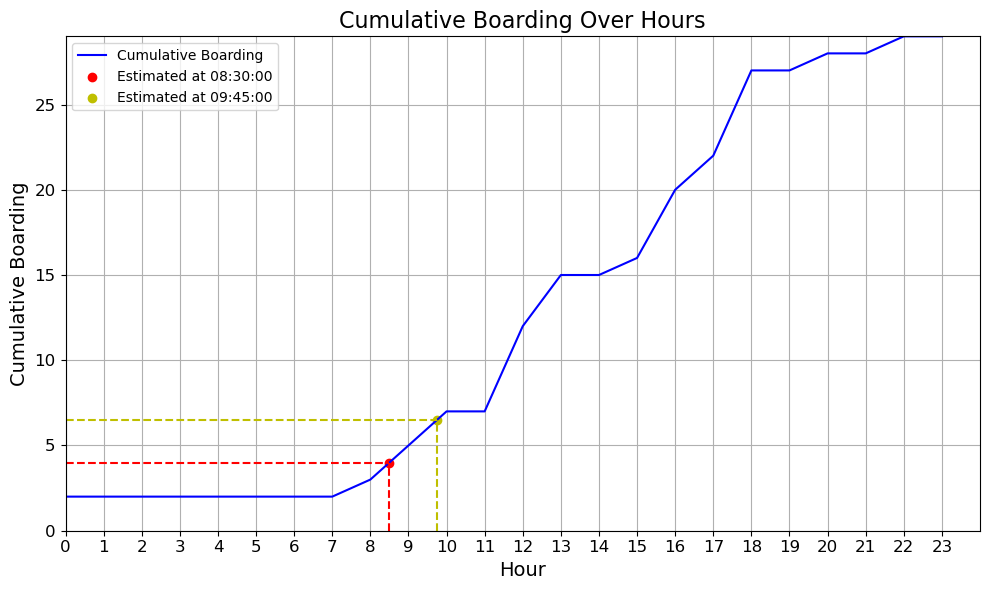

Count of people boarded is 2.5


In [103]:
import pandas as pd
import matplotlib.pyplot as plt

def estimate_boarding_at_time(target_time):
    target_minutes = pd.to_datetime(target_time).hour * 60 + pd.to_datetime(target_time).minute

    previous_index = df[df['Minutes'] <= target_minutes].index[-1]
    next_index = previous_index + 1

    # Get the corresponding minutes and cumulative boarding counts
    previous_minutes = df.loc[previous_index, 'Minutes']
    next_minutes = df.loc[next_index, 'Minutes']
    previous_boarding = df.loc[previous_index, 'Cumulative Boarding']
    next_boarding = df.loc[next_index, 'Cumulative Boarding']

    #Linear Interpolation formating
    interpolation_ratio = (target_minutes - previous_minutes) / (next_minutes - previous_minutes)
    estimated_boarding = previous_boarding + (next_boarding - previous_boarding) * interpolation_ratio
    return estimated_boarding


target_time1 = "08:30:00"
target_time2 = "09:45:00"

# Calculate estimated boarding counts for the two times
estimated_boarding1 = estimate_boarding_at_time(target_time1)
estimated_boarding2 = estimate_boarding_at_time(target_time2)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(df['Hour'], df['Cumulative Boarding'], linestyle='-', color='b', label='Cumulative Boarding')
plt.scatter([pd.to_datetime(target_time1).hour + pd.to_datetime(target_time1).minute / 60], [estimated_boarding1], color='r', marker='o', label=f'Estimated at {target_time1}')
plt.scatter([pd.to_datetime(target_time2).hour + pd.to_datetime(target_time2).minute / 60], [estimated_boarding2], color='y', marker='o', label=f'Estimated at {target_time2}')

# Plot dotted lines to x-axis and y-axis
plt.plot([pd.to_datetime(target_time1).hour + pd.to_datetime(target_time1).minute / 60, pd.to_datetime(target_time1).hour + pd.to_datetime(target_time1).minute / 60], [0, estimated_boarding1], linestyle='--', color='r')
plt.plot([0, pd.to_datetime(target_time1).hour + pd.to_datetime(target_time1).minute / 60], [estimated_boarding1, estimated_boarding1], linestyle='--', color='r')

plt.plot([pd.to_datetime(target_time2).hour + pd.to_datetime(target_time2).minute / 60, pd.to_datetime(target_time2).hour + pd.to_datetime(target_time2).minute / 60], [0, estimated_boarding2], linestyle='--', color='y')
plt.plot([0, pd.to_datetime(target_time2).hour + pd.to_datetime(target_time2).minute / 60], [estimated_boarding2, estimated_boarding2], linestyle='--', color='y')

plt.title('Cumulative Boarding Over Hours', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Cumulative Boarding', fontsize=14)

plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set x-axis and y-axis limits to ensure lines touch the axis
plt.xlim(0, 24)
plt.ylim(0, max(df['Cumulative Boarding']))

plt.show()


# Calculate the difference between the estimated boarding counts
difference = estimated_boarding2 - estimated_boarding1
print(f"Count of people boarded is {difference}")


Enter the time: 08:30:00


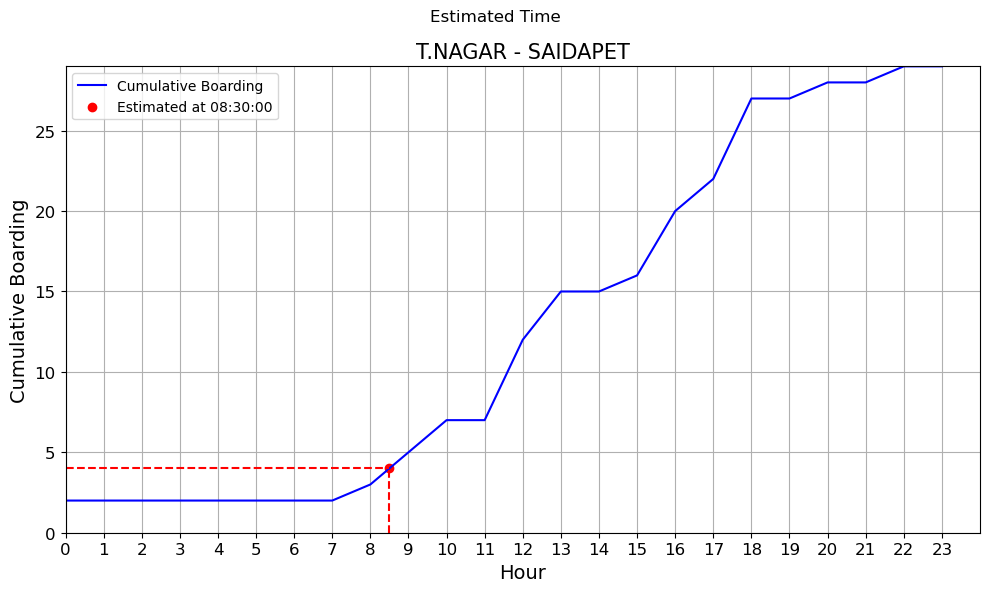

4.0


In [104]:
import pandas as pd
import matplotlib.pyplot as plt

def estimate_boarding_at_time(target_time):
    target_minutes = pd.to_datetime(target_time).hour * 60 + pd.to_datetime(target_time).minute

    previous_index = df[df['Minutes'] <= target_minutes].index[-1]
    next_index = previous_index + 1

    # Get the corresponding minutes and cumulative boarding counts
    previous_minutes = df.loc[previous_index, 'Minutes']
    next_minutes = df.loc[next_index, 'Minutes']
    previous_boarding = df.loc[previous_index, 'Cumulative Boarding']
    next_boarding = df.loc[next_index, 'Cumulative Boarding']

    #Linear Interpolation formating
    interpolation_ratio = (target_minutes - previous_minutes) / (next_minutes - previous_minutes)
    estimated_boarding = previous_boarding + (next_boarding - previous_boarding) * interpolation_ratio
    return estimated_boarding


target_time =input("Enter the time: ")

estimated_count = estimate_boarding_at_time(target_time)

plt.figure(figsize=(10, 6))
plt.plot(df['Hour'], df['Cumulative Boarding'], linestyle='-', color='b', label='Cumulative Boarding')
plt.scatter([pd.to_datetime(target_time).hour + pd.to_datetime(target_time).minute / 60], [estimated_count], color='r', marker='o', label=f'Estimated at {target_time}')

# Plot dotted lines to x-axis and y-axis
plt.plot([pd.to_datetime(target_time).hour + pd.to_datetime(target_time).minute / 60, pd.to_datetime(target_time).hour + pd.to_datetime(target_time).minute / 60], [0, estimated_count], linestyle='--', color='r')
plt.plot([0, pd.to_datetime(target_time).hour + pd.to_datetime(target_time).minute / 60], [estimated_count, estimated_count], linestyle='--', color='r')

plt.title(f"{from_stage} - {to_stage}",fontsize=15)
plt.suptitle("Estimated Time")
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Cumulative Boarding', fontsize=14)

plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set x-axis and y-axis limits to ensure lines touch the axis
plt.xlim(0, 24)
plt.ylim(0, max(df['Cumulative Boarding']))
plt.show()

print(estimated_count)
